### Required Questions: Please answer completely all four required questions.

#### Question 1
Programmatically download and load into your favorite analytical tool the trip data for September 2015.
Report how many rows and columns of data you have loaded.

#### Question 2
Plot a histogram of the number of the trip distance ("Trip Distance").
Report any structure you find and any hypotheses you have about that structure.

#### Question 3
Report mean and median trip distance grouped by hour of day.
We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

#### Question 4
Build a derived variable for tip as a percentage of the total fare.
Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#### Question 1
Programmatically download and load into your favorite analytical tool the trip data for September 2015.
Report how many rows and columns of data you have loaded.

In [2]:
# Dataset can be loaded from url provided by TLC
#url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv"

trips = pd.read_csv('./data/green_tripdata_2015-09.csv')

In [3]:
# Inspect number of rows/columns
print "Number of rows = %i" % (trips.shape[0])
print "Number of columns = %i" % (trips.shape[1])

Number of rows = 1494926
Number of columns = 21


In [4]:
# I also examined column description
# Data dictionaries can be found at 
# http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf
print trips.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type '],
      dtype='object')


In [5]:
# A quick look on data
trips.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [6]:
# Check the completeness of data
trips.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1494926
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      4
dtype: int64

#### Question 2
Plot a histogram of the number of the trip distance ("Trip Distance").
Report any structure you find and any hypotheses you have about that structure.

In [7]:
# Summary statistics
print "Mean = %.3f" % trips.Trip_distance.mean()
print "Standard deviation = %.3f" % trips.Trip_distance.std()
print "Median = %.3f" % trips.Trip_distance.median()
print "Min = %.3f" % trips.Trip_distance.min()
print "Max = %.3f" % trips.Trip_distance.max()

Mean = 2.968
Standard deviation = 3.077
Median = 1.980
Min = 0.000
Max = 603.100


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


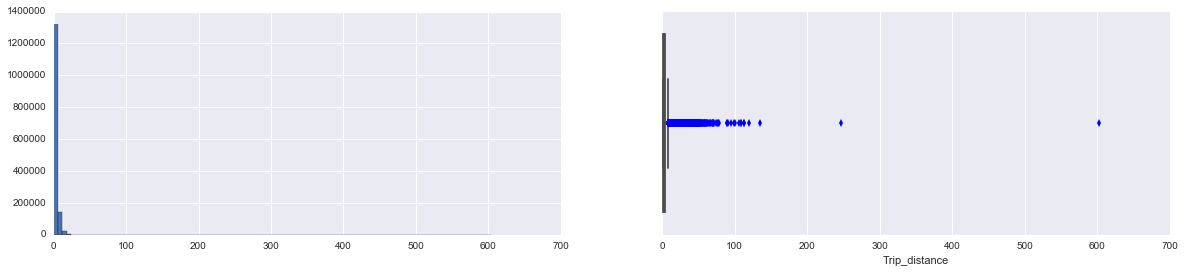

In [8]:
# Plot histogram and Box-plot to visualize Trip_distance
# Create a figure instance, and the two subplots
fig = plt.figure(figsize = (20,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

p1 = trips.Trip_distance.hist(bins=100, ax=ax1)
p2 = sns.boxplot(trips.Trip_distance, ax=ax2)

In [9]:
check_col = ['lpep_pickup_datetime','Lpep_dropoff_datetime','Pickup_longitude','Pickup_latitude',
       'Dropoff_longitude','Dropoff_latitude','RateCodeID','Passenger_count','Trip_distance','Fare_amount',
       'Tip_amount','Tolls_amount','Total_amount','Payment_type']

In [10]:
# Let's also check rows with Trip distance > 100 miles to see if they are valid outliers
trips[trips.Trip_distance > 100][check_col]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,RateCodeID,Passenger_count,Trip_distance,Fare_amount,Tip_amount,Tolls_amount,Total_amount,Payment_type
478080,2015-09-10 21:15:00,2015-09-11 00:52:07,-73.871719,40.771744,-76.121590,42.799343,5,1,246.28,300.00,77.44,9.75,387.19,1
516757,2015-09-11 17:22:50,2015-09-11 20:39:48,-73.937775,40.800926,-72.269753,40.928116,1,1,120.13,316.00,0.00,0.00,317.80,2
885097,2015-09-18 20:21:27,2015-09-18 22:36:04,-73.958954,40.819847,-72.258629,40.930805,1,1,100.74,258.50,0.00,0.00,259.80,2
944537,2015-09-19 18:49:29,2015-09-19 21:06:23,-73.961609,40.805958,-72.261024,41.917648,1,1,134.70,342.50,102.95,0.00,446.25,1
1077032,2015-09-22 10:30:53,2015-09-22 12:28:59,-73.898193,40.749580,-73.899033,40.746319,1,1,105.65,271.50,0.00,15.29,287.59,2
1282594,2015-09-26 17:23:52,2015-09-27 00:00:00,-73.803436,40.677845,-73.840210,40.719513,5,2,108.62,180.00,18.08,0.00,198.88,1
1321961,2015-09-27 03:13:48,2015-09-27 03:24:12,-73.937164,40.804386,-73.901382,40.819443,1,1,603.10,1.25,0.00,0.00,2.55,2
1416994,2015-09-29 10:45:52,2015-09-29 16:55:23,-73.931129,40.693161,-73.936172,40.685581,1,2,112.60,389.00,0.00,41.08,430.88,1
1432692,2015-09-29 17:01:17,2015-09-29 17:01:19,-73.936172,40.685581,-73.936172,40.685581,3,1,112.60,20.00,6.35,0.00,27.65,1
1457965,2015-09-30 09:42:56,2015-09-30 09:42:56,-73.914627,40.871475,-73.912315,40.872181,5,1,108.50,18.00,0.00,0.00,18.30,2


There seems to be an unusual data point: Trip distance is 603.1 miles but the fare amount is only 1.25. Let's also check rows with Trip distance > 100 miles to see if they are valid outliers. It's highly likely that this is caused by data entry error. Also, there are two data points with trip distance of 112.60 and 108.50 miles but the fare amounts of \$20 and \$18 respectively. These two data points seem unusual as well. 

However, at this point, we will only remove that one data point which we are confident that it's an outlier due to data entry error

In [11]:
# Remove outlier (600 miles) and assign new dataframe 'clean_trips'
clean_trips = trips[trips.Trip_distance < 600]

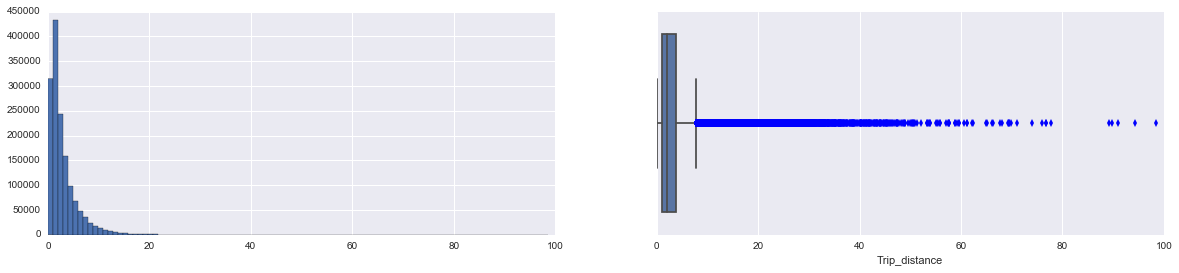

In [12]:
# To better visualize the trip distance in general we will only plot histogram for 
# the trips with trip distance less than 100 miles
fig = plt.figure(figsize = (20,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
p1 = clean_trips[clean_trips.Trip_distance < 100].Trip_distance.hist(bins=100, ax=ax1)
p2 = sns.boxplot(clean_trips[clean_trips.Trip_distance < 100].Trip_distance, ax=ax2)

In summary, the trip distance data has right-skewed distribution, where mean (2.968 miles) is less than median (1.980 miles)

#### Question 3
Report mean and median trip distance grouped by hour of day.
We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

##### Mean and median trip distance grouped by hour of day

In [13]:
clean_trips.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type '],
      dtype='object')

In [14]:
clean_trips.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [15]:
clean_trips['lpep_pickup_datetime'].max(), clean_trips['lpep_pickup_datetime'].min()

('2015-09-30 23:59:58', '2015-09-01 00:00:00')

In [16]:
# We will use pick-up date/time to calculate mean/median of trip distance by hour of day
# First, convert to datetime data type
clean_trips['pickup_datetime'] = pd.to_datetime(clean_trips['lpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
clean_trips['dropoff_datetime'] = pd.to_datetime(clean_trips['Lpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
clean_trips['hour_pickup'] = clean_trips['pickup_datetime'].dt.hour
clean_trips['hour_dropoff'] = clean_trips['dropoff_datetime'].dt.hour

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [18]:
# Trip distance by hour of day (based on pickup hour of day)
distance_by_hour_pickup = clean_trips.groupby('hour_pickup').agg({'Trip_distance':(np.mean,np.median)})

In [19]:
distance_by_hour_pickup.reset_index()

hour_pickup Trip_distance       
                        mean median
0            0      3.115276   2.20
1            1      3.017347   2.12
2            2      3.046176   2.14
3            3      3.193985   2.20
4            4      3.526555   2.36
5            5      4.133474   2.90
6            6      4.055149   2.84
7            7      3.284394   2.17
8            8      3.048450   1.98
9            9      2.999105   1.96
10          10      2.944482   1.92
11          11      2.912015   1.88
12          12      2.903065   1.89
13          13      2.878294   1.84
14          14      2.864304   1.83
15          15      2.857040   1.81
16          16      2.779852   1.80
17          17      2.679114   1.78
18          18      2.653222   1.80
19          19      2.715597   1.85
20          20      2.777052   1.90
21          21      2.999189   2.03
22          22      3.185394   2.20
23          23      3.191538   2.22

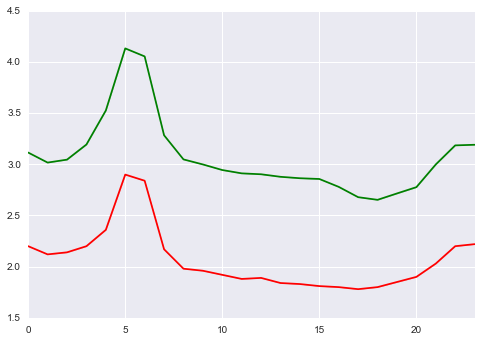

In [20]:
ax = sns.tsplot(distance_by_hour_pickup['Trip_distance']['mean'], color='g')
sns.tsplot(distance_by_hour_pickup['Trip_distance']['median'], color='r')

##### Trip from/to NYC area airports

In [21]:
trips.RateCodeID.value_counts()

1     1454464
5       33943
2        4435
3        1117
4         925
6          36
99          6
Name: RateCodeID, dtype: int64

There are three major airports in NYC area: JFK, La Guardia and Newark (in NJ)

According to fare types defined by TLC (http://www.nyc.gov/html/tlc/html/passenger/taxicab_rate.shtml), taxi trip from/to JFK and Newark are of special RateCodeID '2' and '3' respectively whereas the trip from/to La Guardia is standard (metered) fare (RateCodeID = '1').

For this question, I will analyze the trip from/to JFK, which is the largest airport among the three.

In [22]:
# Filter trip from/to JFK i.e. RatedCodeID = 2
jfk_trips = trips[trips.RateCodeID==2]

In [23]:
print "Number of trip from/to JFK = %s trips" % jfk_trips.shape[0]

Number of trip from/to JFK = 4435 trips


In [24]:
jfk_trips.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type '],
      dtype='object')

In [25]:
# Average Fare 
print "Trip distance mean = %.3f" % jfk_trips.Trip_distance.mean()
print "Trip distance median = %.3f" % jfk_trips.Trip_distance.median()
print "Fare amount mean = %.2f" % jfk_trips.Fare_amount.mean()
print "Fare amount median = %.2f" % jfk_trips.Fare_amount.median()
print "Tolls amount mean = %.2f" % jfk_trips.Tolls_amount.mean()
print "Tolls amount median = %.2f" % jfk_trips.Tolls_amount.median()
print "Tip amount mean = %.2f" % jfk_trips.Tip_amount.mean()
print "Tip amount median = %.2f" % jfk_trips.Tip_amount.median()
print "Total amount mean = %.2f" % jfk_trips.Total_amount.mean()
print "Total amount median = %.2f" % jfk_trips.Total_amount.median()

Trip distance mean = 10.245
Trip distance median = 16.590
Fare amount mean = 49.02
Fare amount median = 52.00
Tolls amount mean = 2.68
Tolls amount median = 0.00
Tip amount mean = 4.08
Tip amount median = 0.00
Total amount mean = 56.53
Total amount median = 58.34


In [26]:
standard_trips = trips[trips.RateCodeID==1]

In [27]:
print "Trip distance mean = %.3f" % standard_trips.Trip_distance.mean()
print "Trip distance median = %.3f" % standard_trips.Trip_distance.median()
print "Fare amount mean = %.2f" % standard_trips.Fare_amount.mean()
print "Fare amount median = %.2f" % standard_trips.Fare_amount.median()
print "Tolls amount mean = %.2f" % standard_trips.Tolls_amount.mean()
print "Tolls amount median = %.2f" % standard_trips.Tolls_amount.median()
print "Tip amount mean = %.2f" % standard_trips.Tip_amount.mean()
print "Tip amount median = %.2f" % standard_trips.Tip_amount.median()
print "Total amount mean = %.2f" % standard_trips.Total_amount.mean()
print "Total amount median = %.2f" % standard_trips.Total_amount.median()

Trip distance mean = 2.923
Trip distance median = 1.970
Fare amount mean = 12.24
Fare amount median = 9.50
Tolls amount mean = 0.11
Tolls amount median = 0.00
Tip amount mean = 1.23
Tip amount median = 0.00
Total amount mean = 14.74
Total amount median = 11.75


##### Alternative approach by using Lat/Lon coordinates

#### Question 4
Build a derived variable for tip as a percentage of the total fare.
Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

In [29]:
print "Number of trips with Tip amount = 0: %s" % len(clean_trips[clean_trips.Tip_amount==0])
print "Number of trips with Tip amount < 0: %s" % len(clean_trips[clean_trips.Tip_amount<0])
print "Number of trips with Tip amount > 0: %s" % len(clean_trips[clean_trips.Tip_amount>0])

Number of trips with Tip amount = 0: 892155
Number of trips with Tip amount < 0: 38
Number of trips with Tip amount > 0: 602732


According to the data dictionaries provided by TLC, Tip_amount field only records credit card tips, not cash tips. Hence, the Tip_amount value = 0 could be either actual no tip or tip not recorded. 

There is another column called 'Payment_type', which specify different type of payment.

I decided not to include the trips with Tip amount = 0 in building the predictive model since I think they do not the represent ground truth

In [34]:
clean_trips[(clean_trips.Payment_type==2) & (clean_trips.Tip_amount > 0)][check_col]

,lpep_pickup_datetime,Lpep_dropoff_datetime,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,RateCodeID,Passenger_count,Trip_distance,Fare_amount,Tip_amount,Tolls_amount,Total_amount,Payment_type
74598,2015-09-02 19:42:27,2015-09-02 19:42:38,-73.93058,40.685566,-73.930580,40.685566,1,1,1.1,2.5,150.00,0.0,154.30,2
1341588,2015-09-27 15:24:32,2015-09-27 16:24:51,-73.92823,40.761208,-74.177002,40.694790,1,2,21.1,65.5,13.26,0.0,79.56,2


In [35]:
# Payment type definition
# 1 = Credit Card
# 2 = Cash
# 3 = No Charge
# 4 = Dispute
# 5 = Unknown
# 6 = Voided trip
clean_trips[clean_trips.Tip_amount==0].Payment_type.value_counts()

2    783696
1     98557
3      5463
4      4365
5        74
Name: Payment_type, dtype: int64

In [36]:
clean_trips[clean_trips.Tip_amount<0].Payment_type.value_counts()

3    35
4     2
1     1
Name: Payment_type, dtype: int64

In [37]:
clean_trips[clean_trips.Tip_amount>0].Payment_type.value_counts()

1    602729
2         2
4         1
Name: Payment_type, dtype: int64

To sum up, I will use only the trips that belong to credit card payment type and tip amount > 0 to build the predictive model

In [38]:
data_trips = clean_trips[(clean_trips.Payment_type==1) & (clean_trips.Tip_amount >= 0)]

In [39]:
print "The number of data points to used for prediction = %s" % data_trips.shape[0]

The number of data points to used for prediction = 701286


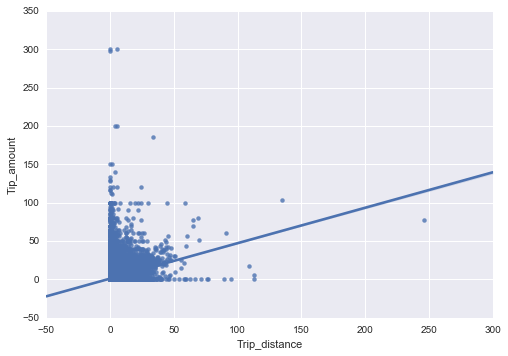

In [41]:
# Plot correlation
sns.regplot(data_trips['Trip_distance'], data_trips['Tip_amount'])

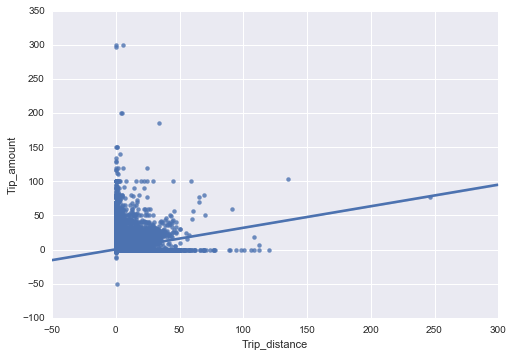

In [42]:
sns.regplot(clean_trips['Trip_distance'], clean_trips['Tip_amount'])

In [80]:
def calculate_tip_percentage(row):
    if row['Total_amount'] != 0:
        return row['Tip_amount'] * 100 / row['Total_amount']
    else:
        return 0
    
#data_trips['tip_percentage'] = data_trips['Tip_amount'] * 100 / data_trips['Total_amount']
data_trips['tip_percentage'] = data_trips.apply(calculate_tip_percentage, axis=1)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [82]:
data_trips.isnull().sum()

VendorID                      0
lpep_pickup_datetime          0
Lpep_dropoff_datetime         0
Store_and_fwd_flag            0
RateCodeID                    0
Pickup_longitude              0
Pickup_latitude               0
Dropoff_longitude             0
Dropoff_latitude              0
Passenger_count               0
Trip_distance                 0
Fare_amount                   0
Extra                         0
MTA_tax                       0
Tip_amount                    0
Tolls_amount                  0
Ehail_fee                701286
improvement_surcharge         0
Total_amount                  0
Payment_type                  0
Trip_type                     3
pickup_datetime               0
dropoff_datetime              0
hour_pickup                   0
hour_dropoff                  0
tip_percentage                0
weekday_pickup                0
weekday_dropoff               0
day_pickup                    0
day_dropoff                   0
dtype: int64

In [83]:
data_trips['tip_percentage'].describe()

count    701286.000000
mean         14.142424
std           7.839868
min           0.000000
25%          10.769231
50%          16.666667
75%          16.666667
max         100.000000
Name: tip_percentage, dtype: float64

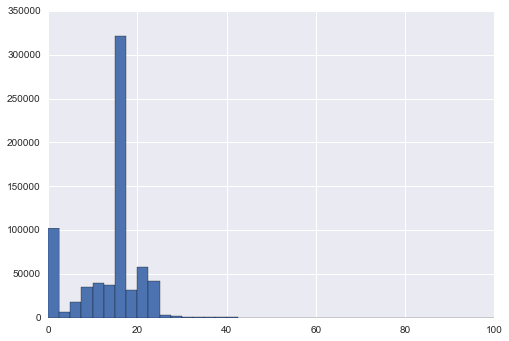

In [84]:
# Histogram of tip percentage
data_trips['tip_percentage'].hist(bins=40)

##### Features Engineering

In [85]:
data_trips.columns

Index([u'VendorID', u'lpep_pickup_datetime', u'Lpep_dropoff_datetime',
       u'Store_and_fwd_flag', u'RateCodeID', u'Pickup_longitude',
       u'Pickup_latitude', u'Dropoff_longitude', u'Dropoff_latitude',
       u'Passenger_count', u'Trip_distance', u'Fare_amount', u'Extra',
       u'MTA_tax', u'Tip_amount', u'Tolls_amount', u'Ehail_fee',
       u'improvement_surcharge', u'Total_amount', u'Payment_type',
       u'Trip_type ', u'pickup_datetime', u'dropoff_datetime', u'hour_pickup',
       u'hour_dropoff', u'tip_percentage', u'weekday_pickup',
       u'weekday_dropoff', u'day_pickup', u'day_dropoff'],
      dtype='object')

In [86]:
# Additional time dimensions
data_trips['weekday_pickup'] = data_trips['pickup_datetime'].dt.weekday
data_trips['weekday_dropoff'] = data_trips['dropoff_datetime'].dt.weekday
data_trips['day_pickup'] = data_trips['pickup_datetime'].dt.day
data_trips['day_dropoff'] = data_trips['dropoff_datetime'].dt.day

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [87]:
features = ['hour_pickup','hour_dropoff','weekday_pickup','weekday_dropoff','day_pickup','day_dropoff',
            'RateCodeID','Passenger_count','Trip_distance',
            'Pickup_longitude','Pickup_latitude','Dropoff_longitude','Dropoff_latitude']
target = ['tip_percentage']

In [88]:
data_trips[features].head()

,hour_pickup,hour_dropoff,weekday_pickup,weekday_dropoff,day_pickup,day_dropoff,RateCodeID,Passenger_count,Trip_distance,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude
0,0,0,1,1,1,1,5,1,0.00,-73.979485,40.684956,-73.979431,40.685020
1,0,0,1,1,1,1,5,1,0.00,-74.010796,40.912216,-74.010780,40.912212
2,0,0,1,1,1,1,1,1,0.59,-73.921410,40.766708,-73.914413,40.764687
5,0,0,1,1,1,1,1,1,1.07,-73.945297,40.808186,-73.937668,40.821198
6,0,0,1,1,1,1,1,1,1.43,-73.890877,40.746426,-73.876923,40.756306


In [89]:
data_trips[target].isnull().sum()

tip_percentage    0
dtype: int64

In [90]:
# Split test/train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_trips[features], data_trips[target], test_size=0.2, random_state=42)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((561028, 13), (140258, 13), (561028, 1), (140258, 1))

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=45)
rf.fit(X_train, y_train)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=45, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [94]:
scores

array([-54.80100252, -54.12148278, -55.1945873 , -54.06861692, -55.17908864])